# Import Packages

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
# Import Dataset
raw_data = pd.read_csv('car_price_raw.csv')
raw_data.head(12)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000,Diesel,90.0,0.0,0,2000,3,1165
4,13750,NaN,38500,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000,Diesel,90.0,0.0,0,2000,3,1170
6,16900,27.0,94612,Diesel,90.0,1.0,0,2000,3,1245
7,18600,30.0,75889,Diesel,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700,Petrol,192.0,0.0,0,1800,3,1185
9,21500,27.0,19700,Petrol,192.0,0.0,0,1800,3,1185


## Data Exploration

### Overview about the dataset

In [3]:
raw_data.describe(include ='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1437.000000,1436.000000,1437.000000,1437,1436.000000,1436.000000,1437.000000,1437.000000,1437.000000,1437.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1265,NaN,NaN,NaN,NaN,NaN,NaN
mean,10738.318720,55.944986,68499.276966,NaN,101.502089,0.674095,0.055672,1566.990257,4.032707,1072.537926
std,3636.814232,18.603073,37515.511159,NaN,14.981080,0.468875,0.229366,187.218323,0.952735,52.706466
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63328.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87000.000000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [4]:
# Check total number of attributes
print("No. of Attributes (Columns): ",len(raw_data.columns))
print("No. of sample (Rows): ",len(raw_data))

No. of Attributes (Columns):  10
No. of sample (Rows):  1437


### Checking and Treating Missing Values

In [5]:
#Identify Missing Values

raw_data.isnull().sum()

Price        0
Age          1
KM           0
FuelType     0
HP           1
MetColor     1
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [6]:
#Locate the row of Missing Values
trace_missing_age = pd.isnull(raw_data['Age'])
raw_data[trace_missing_age]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
4,13750,NaN,38500,Diesel,90.0,0.0,0,2000,3,1170


In [7]:
trace_missing_hp = pd.isnull(raw_data['HP'])
raw_data[trace_missing_hp]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
14,21500,31.0,23000,Petrol,NaN,1.0,0,1800,3,1185


In [8]:
trace_missing_MetColor = pd.isnull(raw_data['MetColor'])
raw_data[trace_missing_MetColor]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
18,17950,24.0,21716,Petrol,110.0,NaN,0,1600,3,1105


In [9]:
#Treating Missing Values

#Replace with Median
raw_data.Age = raw_data.Age.fillna(raw_data.Age.median()) #By Column

In [10]:
#Most Frequent or mode for MetColor
raw_data.MetColor = raw_data.MetColor.fillna(raw_data.MetColor.mode()[0]) #By Column

In [11]:
#Delete Missing Value based on particular column
raw_data=raw_data.dropna(subset=['HP'])

In [12]:
#Recheck
raw_data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

## Checking Duplicated Rows

In [13]:
#Check duplicated rows
raw_data[raw_data.duplicated(keep=False)]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
8,21500,27.0,19700,Petrol,192.0,0.0,0,1800,3,1185
9,21500,27.0,19700,Petrol,192.0,0.0,0,1800,3,1185
113,24950,8.0,13253,Diesel,116.0,1.0,0,2000,5,1320
114,24950,8.0,13253,Diesel,116.0,1.0,0,2000,5,1320


In [14]:
#Remove duplicates and keep the first
raw_data.drop_duplicates(keep='first', inplace = True) #Inplace true mean no need to assigned into new variable

#Recheck again
raw_data[raw_data.duplicated(keep=False)]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight


In [15]:
#Reset into new index
raw_data = raw_data.reset_index(drop=True)

In [16]:
#Copy cleaned data into new dataframe (optional)

data_clean = raw_data.copy()
data_clean.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000,Diesel,90.0,0.0,0,2000,3,1165
4,13750,61.0,38500,Diesel,90.0,0.0,0,2000,3,1170


## Statistics Exploration

In [17]:
#Data Exploration

#Descriptive Statistics
data_clean.describe(include = 'all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1434.000000,1434.000000,1434.000000,1434,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1263,NaN,NaN,NaN,NaN,NaN,NaN
mean,10713.398884,56.019526,68603.562064,NaN,101.428870,0.674338,0.055788,1566.363319,4.033473,1072.208508
std,3598.736494,18.545797,37484.833847,NaN,14.794551,0.468785,0.229592,186.861091,0.952608,52.185178
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63455.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87062.250000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [18]:
# Check total number of attributes
print("No. of Attributes (Columns): ",len(data_clean.columns))
print("No. of sample (Rows): ",len(data_clean))

No. of Attributes (Columns):  10
No. of sample (Rows):  1434


### Measure of Central Tendency

In [19]:
#Checking for Mean
#data.mean()
pd.DataFrame(round(data_clean.mean(),2),columns=['Mean'])

,Mean
Price,10713.40
Age,56.02
KM,68603.56
HP,101.43
MetColor,0.67
Automatic,0.06
CC,1566.36
Doors,4.03
Weight,1072.21


In [20]:
#Checking for Median
#data.median()
pd.DataFrame(round(data_clean.median(),2),columns=['Median'])

,Median
Price,9900.0
Age,61.0
KM,63455.0
HP,110.0
MetColor,1.0
Automatic,0.0
CC,1600.0
Doors,4.0
Weight,1070.0


In [21]:
#Checking for Mode
data_clean.mode()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,8950,68.0,36000,Petrol,110.0,1.0,0,1600,5,1075


### Exploring the Probability Distribution Function

In [22]:
#Call Description
data_clean.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,10713.398884,56.019526,68603.562064,101.428870,0.674338,0.055788,1566.363319,4.033473,1072.208508
std,3598.736494,18.545797,37484.833847,14.794551,0.468785,0.229592,186.861091,0.952608,52.185178
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63455.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87062.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

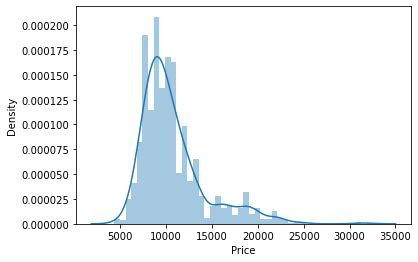

In [23]:
# Plotting Distribution Graph
sns.distplot(data_clean['Price'])

Outliers = observation that lie on abnormal distance from other observations in the data.
It affect the regression. It will cause the coefficient to be inflated.
To deal with this, remove top 1% of observation

In [24]:
#Removing Outliers using Quantile Method. Get the 99th percentile and keep the data below it
q = data_clean['Price'].quantile(0.99)
data_clean = data_clean[data_clean['Price']<q]
data_clean.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1418.000000,1418.000000,1418.000000,1418,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1257,NaN,NaN,NaN,NaN,NaN,NaN
mean,10554.054302,56.501410,69160.181946,NaN,101.161495,0.672073,0.056417,1562.739774,4.026798,1069.930889
std,3269.717890,18.059075,37288.363823,NaN,14.232667,0.469624,0.230808,183.992381,0.952278,46.207177
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43624.500000,NaN,86.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9895.000000,61.000000,63959.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1065.000000
75%,11895.000000,70.000000,87643.750000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

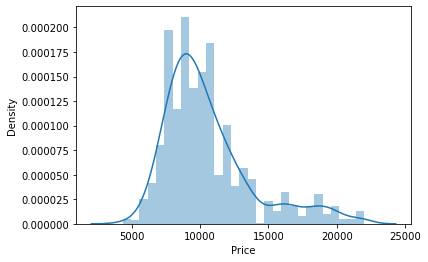

In [25]:
# Plotting Distribution Graph
sns.distplot(data_clean['Price'])

### Plotting Distribution Graph
sns.distplot(data_clean['HP'])

#Removing Outliers using Quantile Method. Get the 99th percentile and keep the data below it
q = data_clean['HP'].quantile(0.99)
data_clean = data_clean[data_clean['HP']<q]
data_clean.describe(include='all')

### Checking for Linearity Assumption between Price & Continuous Input Variables

In [26]:
#Plotting Pairplot of scattered data point (Not Necessary)
#sns.pairplot(data)

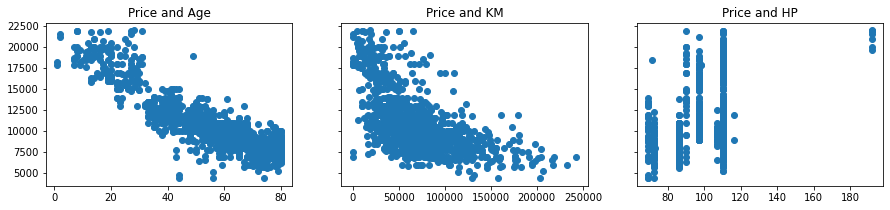

In [27]:
#Plotting Price vs Age, Price vs KM & Price vs HP
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_clean['Age'],data_clean['Price'])
ax1.set_title('Price and Age')
ax2.scatter(data_clean['KM'],data_clean['Price'])
ax2.set_title('Price and KM')
ax3.scatter(data_clean['HP'],data_clean['Price'])
ax3.set_title('Price and HP')

plt.show()

In [28]:
# Apply Log Transformation to deal with exponential relationship
log_price = np.log(data_clean['Price'])
data_clean['Log_Price']=log_price #Add new transform data point into the dataframe

In [29]:
data_clean.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Log_Price
0,13500,23.0,46986,Diesel,90.0,1.0,0,2000,3,1165,9.510445
1,13750,23.0,72937,Diesel,90.0,1.0,0,2000,3,1165,9.528794
2,13950,24.0,41711,Diesel,90.0,1.0,0,2000,3,1165,9.543235
3,14950,26.0,48000,Diesel,90.0,0.0,0,2000,3,1165,9.612467
4,13750,61.0,38500,Diesel,90.0,0.0,0,2000,3,1170,9.528794


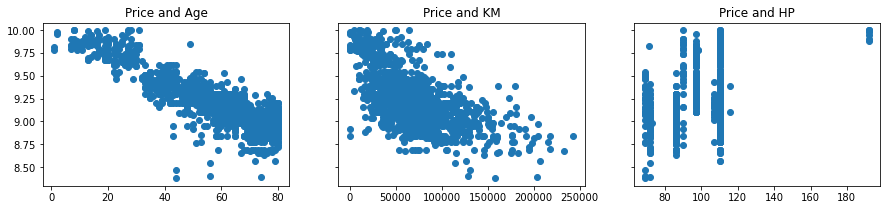

In [30]:
#Plotting Price vs Age, Price vs KM & Price vs HP
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_clean['Age'],data_clean['Log_Price'])
ax1.set_title('Price and Age')
ax2.scatter(data_clean['KM'],data_clean['Log_Price'])
ax2.set_title('Price and KM')
ax3.scatter(data_clean['HP'],data_clean['Log_Price'])
ax3.set_title('Price and HP')

plt.show()

In [31]:
data_clean=data_clean.drop(['Log_Price'], axis=1)
data_clean.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000,Diesel,90.0,0.0,0,2000,3,1165
4,13750,61.0,38500,Diesel,90.0,0.0,0,2000,3,1170


## Features Selection

### Use Correlation for Continuous Variables

<AxesSubplot:>

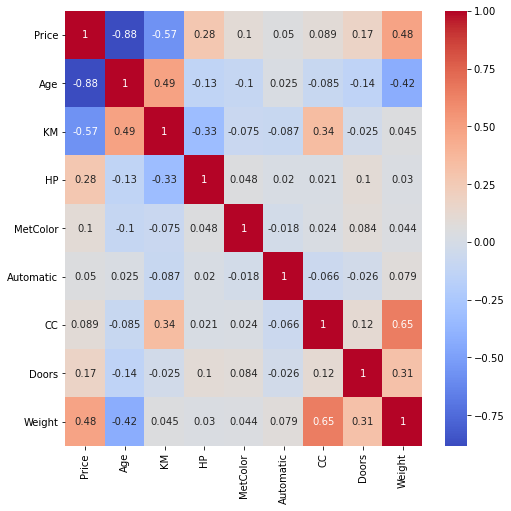

In [32]:
# Correlation 
data_clean.corr()

# Heatmap Correlation
plt.figure(figsize=(8,8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm')
#Annot is to add the annotation from correlation matrix
#cmap - color map

### Categorical Features selection using Chi-Square

In [33]:
# Import function
from scipy.stats import chi2_contingency

#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(data_clean['Price'],data_clean['FuelType']))

print('For FuelType: Chi2 Statistics: {} and p-value: {}'.format(chi_res[0],chi_res[1]))

## The decision of accept or reject null hypothesis is depend on the significant level.
## The number of classes for FuelType are 3.
## For continuous or single class, use 0.05
## Two classes use 0.10
## Three classes use 0.15

For FuelType: Chi2 Statistics: 485.81455295858575 and p-value: 0.08323581765089637


The p-value is 0.08 < 0.15, then the null hypothesis is rejected. Thus, the FuelType is significantly affect the change of Price

### Use for other transformed categorical features

In [34]:
#Testing the relationship MetColor and Price
chi_res1 = chi2_contingency(pd.crosstab(data_clean['Price'],data_clean['MetColor']))
print('For MetColor: Chi2 Statistics: {} and p-value: {}'.format(chi_res1[0],chi_res1[1]))

#Testing the relationship MetColor and Price
chi_res2 = chi2_contingency(pd.crosstab(data_clean['Price'],data_clean['Automatic']))
print('For Automatic: Chi2 Statistics: {} and p-value: {}'.format(chi_res2[0],chi_res2[1]))

#Testing the relationship MetColor and Price
chi_res3 = chi2_contingency(pd.crosstab(data_clean['Price'],data_clean['Doors']))
print('For Doors: Chi2 Statistics: {} and p-value: {}'.format(chi_res3[0],chi_res3[1]))

For MetColor: Chi2 Statistics: 255.99834807692156 and p-value: 0.05831933065970613
For Automatic: Chi2 Statistics: 246.77454992625326 and p-value: 0.12180396824516908
For Doors: Chi2 Statistics: 551.3597489004743 and p-value: 0.9995553633277976


### Checking Multicollinearity for Continuous Variable using VIF
VIF = Variance Inflation Factor
Seem that Age and KM is correlated. Check together with other continous variable.
Should remove one of the dummy variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['Age', 'HP', 'KM']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

#Exclude Dependent/Output Variable

VIF = 1: No Multicollinearity
1 < VIF < 5: Perfectly OK
5 < VIF: Unacceptable. But the par can get up too 8. Depend.

In this case, Age is highly correlated with other variable. Remove from the dataset as predictor.

### Create new dataframe for selected Variables
##### Choose Price,Age, KM, HP, FuelType

In [35]:
data_clean.columns.values

array(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic',
       'CC', 'Doors', 'Weight'], dtype=object)

In [36]:
data = data_clean[['Age','KM','FuelType', 'HP','Price']]
#data = data_clean[['KM', 'FuelType', 'HP','Price']]
data.head()

,Age,KM,FuelType,HP,Price
0,23.0,46986,Diesel,90.0,13500
1,23.0,72937,Diesel,90.0,13750
2,24.0,41711,Diesel,90.0,13950
3,26.0,48000,Diesel,90.0,14950
4,61.0,38500,Diesel,90.0,13750


## Handling Dummy Variable

In [37]:
#Create dummy variables for categorical variable
data_with_dummy = pd.get_dummies(data,drop_first=True)
data_with_dummy.head()

,Age,KM,HP,Price,FuelType_Diesel,FuelType_Petrol
0,23.0,46986,90.0,13500,1,0
1,23.0,72937,90.0,13750,1,0
2,24.0,41711,90.0,13950,1,0
3,26.0,48000,90.0,14950,1,0
4,61.0,38500,90.0,13750,1,0


In [38]:
data = data_with_dummy[['Age','KM', 'HP', 'FuelType_Diesel', 'FuelType_Petrol','Price']]
#data = data_with_dummy[['KM', 'HP', 'FuelType_Diesel', 'FuelType_Petrol','Price']]
data.head(10)

,Age,KM,HP,FuelType_Diesel,FuelType_Petrol,Price
0,23.0,46986,90.0,1,0,13500
1,23.0,72937,90.0,1,0,13750
2,24.0,41711,90.0,1,0,13950
3,26.0,48000,90.0,1,0,14950
4,61.0,38500,90.0,1,0,13750
5,32.0,61000,90.0,1,0,12950
6,27.0,94612,90.0,1,0,16900
7,30.0,75889,90.0,1,0,18600
8,27.0,19700,192.0,0,1,21500
9,23.0,71138,69.0,1,0,12950


## Assign Input & Output Variable

In [39]:
#x = data.drop(['Price'],axis=1) #Assigned input variable into x
#y = data[['Price']] #Assigned output variable into y. Double square to call for dataframe

#Advance Technique
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Feature Scalling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [41]:
x

array([[-1.85575557, -0.5948774 , -0.78449334,  2.97442805, -2.79418207],
       [-1.85575557,  0.10132251, -0.78449334,  2.97442805, -2.79418207],
       [-1.80036221, -0.73639235, -0.78449334,  2.97442805, -2.79418207],
       ...,
       [ 0.80312554, -1.39889694, -1.06563609, -0.33619909,  0.35788649],
       [ 0.74773218, -1.40157969, -1.06563609, -0.33619909,  0.35788649],
       [ 1.08009232, -1.8553665 ,  0.62122039, -0.33619909,  0.35788649]])

## Partitioning Dataset
Train - 80% and Test - 20%

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_test

array([[-0.4155283 ,  0.14309289,  0.62122039, -0.33619909,  0.35788649],
       [ 0.41537204,  1.6963771 , -2.0496357 ,  2.97442805, -2.79418207],
       [ 0.30458533,  0.04935768,  0.62122039, -0.33619909,  0.35788649],
       ...,
       [ 1.19087903,  1.63217894, -1.06563609, -0.33619909,  0.35788649],
       [-0.85867515, -1.05818796,  1.04293451, -0.33619909,  0.35788649],
       [ 0.52615876, -0.24574459, -1.06563609, -0.33619909,  0.35788649]])

## Training the Algorithm

In [44]:
#Apply Linear Regression Algorithm
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
reg_model = sm.OLS(y_train,x_train).fit()

## Applying the Model

In [45]:
x_test = sm.add_constant(x_test)
y_pred = reg_model.predict(x_test) #Predict the output
predicted_test = pd.DataFrame({'Predicted Price':y_pred,'Actual Price':y_test}) #Create Data Frame
predicted_test.head(10)

,Predicted Price,Actual Price
447,11821.457170,8900
626,8347.402766,7950
811,10072.267916,10950
1254,6956.120381,8500
1244,7706.449863,7250
810,9650.622014,8950
658,8951.656792,7950
432,11142.626258,10750
1426,8316.457936,8450
533,12119.338505,11950


## Model Evaluation

In [46]:
# Regression Summary
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1072.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:10:58   Log-Likelihood:                -9801.4
No. Observations:                1134   AIC:                         1.961e+04
Df Residuals:                    1128   BIC:                         1.964e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.058e+04     40.878    258.879      0.000    1.05e+04    1.07e+04
x1         -2506.7385     50.520    -49.619      0.000   -2605.862   -2407.615
x2          -596.8653     56.943    -10.482      0.000    -708.591    -485.139
x3           644.8688     51.019     12.640      0.000     544.765     744.972
x4           629.8256    123.664      5.093      0.000     387.189     872.463
x5           262.3259    121.287      2.163      0.031      24.353     500.299
==============================================================================
Omnibus:                       49.180   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.476
Skew:                           0.080   Prob(JB):                     2.57e-32
Kurtosis:                       4.747   Cond. No.                         6.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

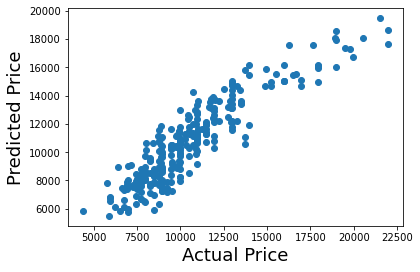

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price',size=18)
plt.ylabel('Predicted Price',size=18)
plt.show()

In [48]:
predicted_test['Residual']=predicted_test['Actual Price']-predicted_test['Predicted Price']

predicted_test.head(5)

,Predicted Price,Actual Price,Residual
447,11821.457170,8900,-2921.457170
626,8347.402766,7950,-397.402766
811,10072.267916,10950,877.732084
1254,6956.120381,8500,1543.879619
1244,7706.449863,7250,-456.449863


In [49]:
predicted_test['%Diff']=np.absolute(predicted_test['Residual'] / predicted_test['Actual Price'])*100
predicted_test = np.around(predicted_test,2)
predicted_test.head()

,Predicted Price,Actual Price,Residual,%Diff
447,11821.46,8900,-2921.46,32.83
626,8347.40,7950,-397.40,5.00
811,10072.27,10950,877.73,8.02
1254,6956.12,8500,1543.88,18.16
1244,7706.45,7250,-456.45,6.30


In [50]:
#Correlation of Predicted Price vs Actual Price
pred_actual = predicted_test[['Predicted Price','Actual Price']]
pred_actual.corr()

,Predicted Price,Actual Price
Predicted Price,1.000000,0.909388
Actual Price,0.909388,1.000000


## Saved Model

In [51]:
import pickle

filename = 'reg_model_save.sav' #Assigning name to the model

#Write it to the file
pickle.dump(reg_model, open(filename,'wb')) #wb - write binary

# Load and Apply Model for New Dataset

In [53]:
#Load Saved Model
import pickle
filename = 'reg_model_save.sav'
loaded_model = pickle.load(open(filename,'rb')) #rb - read binary

In [54]:
#Load New Dataset
new_data = pd.read_csv('new_car_price.csv')
#index col = 'Car'
new_data.head()

,Car,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,Car 1,23,46986,Diesel,90,1,0,2000,3,1165
1,Car 2,30,75889,Diesel,90,1,0,2000,3,1245
2,Car 3,27,19700,Petrol,192,0,0,1800,3,1185
3,Car 4,27,19700,Petrol,192,0,0,1800,3,1185
4,Car 5,23,71138,Diesel,69,0,0,1900,3,1105


In [55]:
#Set Car as Index
new_data_process = new_data.set_index('Car')

In [56]:
#Create dummy variables for categorical variable
new_data_dummy = pd.get_dummies(new_data_process)
new_data_dummy = pd.get_dummies(new_data_process,drop_first=True)
new_data_dummy.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
Car,,,,,,,,,,
Car 1,23,46986,90,1,0,2000,3,1165,1,0
Car 2,30,75889,90,1,0,2000,3,1245,1,0
Car 3,27,19700,192,0,0,1800,3,1185,0,1
Car 4,27,19700,192,0,0,1800,3,1185,0,1
Car 5,23,71138,69,0,0,1900,3,1105,1,0


In [57]:
#Call input variable
input_new = new_data_dummy[['Age','KM', 'HP', 'FuelType_Diesel', 'FuelType_Petrol']]
#input_new = new_data_dummy[['KM', 'HP', 'FuelType_Diesel', 'FuelType_Petrol']]
input_new.head()

,Age,KM,HP,FuelType_Diesel,FuelType_Petrol
Car,,,,,
Car 1,23,46986,90,1,0
Car 2,30,75889,90,1,0
Car 3,27,19700,192,0,1
Car 4,27,19700,192,0,1
Car 5,23,71138,69,1,0


In [58]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(input_new)
input_new = scaler.transform(input_new)

In [59]:
#Predict
import statsmodels.api as sm
input_new = sm.add_constant(input_new)
predict_output = loaded_model.predict(input_new)
predict_output = pd.DataFrame({'Predicted Price':predict_output}) #Create Data Frame

In [61]:
#Create dataframe
new_predict = pd.concat([new_data,predict_output], axis = 1)

In [62]:
new_predict.head()

,Car,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Predicted Price
0,Car 1,23,46986,Diesel,90,1,0,2000,3,1165,16135.869636
1,Car 2,30,75889,Diesel,90,1,0,2000,3,1245,14715.640951
2,Car 3,27,19700,Petrol,192,0,0,1800,3,1185,19234.370663
3,Car 4,27,19700,Petrol,192,0,0,1800,3,1185,19234.370663
4,Car 5,23,71138,Diesel,69,0,0,1900,3,1105,14832.171171


In [61]:
#Save Prediction
new_predict.to_csv('new_predict_price.csv',index=False)